In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from textblob import TextBlob # Sentiment analysis Library
import matplotlib.pyplot as plt

# Load the reviews data
df = pd.read_csv('reviews.csv')

# Data preprocessing
# Drop rows with missing values
df.dropna(inplace=True)


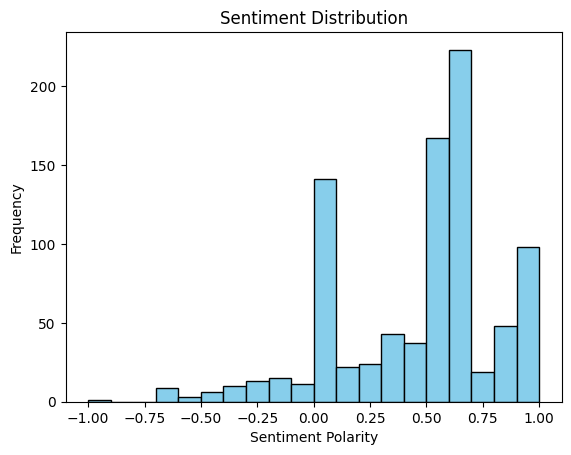

In [ ]:
# Perform sentiment analysis on reviews
df['Sentiment'] = df['reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Visualize sentiment distribution
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Feature Engineering
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['reviews'])
y = (df['Sentiment'] > 0).astype(int) # Binary classification: Positive sentiment


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8932584269662921


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76        36
           1       0.96      0.91      0.93       142

    accuracy                           0.89       178
   macro avg       0.83      0.87      0.85       178
weighted avg       0.90      0.89      0.90       178



In [ ]:
# Predictive Analysis Application: Predict satisfaction based on sentiment

new_comment = "I had a great experience at the restaurant!"

new_sentiment = TextBlob(new_comment).sentiment.polarity

new_comment_vectorized = vectorizer.transform([new_comment])

predicted_satisfaction = model.predict(new_comment_vectorized)[0]

if predicted_satisfaction == 1:
    print("Predicted satisfaction: Satisfied")
else:
    print("Predicted satisfaction: Not satisfied")


Predicted satisfaction: Satisfied


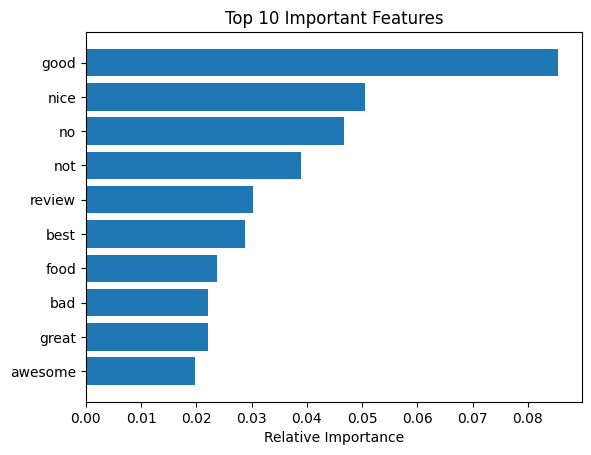

In [ ]:
# Visualize important features

# Example: Visualize top 10 important features
importances = model.feature_importances_
indices = importances.argsort()[-10:]
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(idx)] for idx in indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Predictive Analysis Application: Identify areas for improvement based on sentiment

negative_reviews = df[df['Sentiment'] < 0]['reviews']

if not negative_reviews.empty:
    print("\nPotential areas for improvement based on negative sentiment:")
    for review in negative_reviews.head():
        print("-", review)
else:
    print("\nNo negative sentiment reviews found.")



Potential areas for improvement based on negative sentiment:
- went lunch okay service pomfret fry stale fish smelling could not eat still hotel charged r 1200 dish average
- restaurant beautifulfood exceptional hated servicewe standing near front desk table atleast 68mins no one even attended usthere people desk near door table no one
- worst food unhealthy not fresh poor quality saturday sunday
- hotel become worst good earlier bad service ordered paneer dish didnt made wanted hence immediately
- today ordered food restaurant zomato guess bread served horrible hard could cut piece paneer like knife not one think
